Esta notebook contiene bloques de código útiles para realizar Q-learning en el entorno "Taxi"

In [73]:
import numpy as np
import random
from taxi_env_extended import TaxiEnvExtended

In [74]:
env = TaxiEnvExtended()

Obtener la cantidad de estados y acciones

In [75]:
actions = env.action_space.n
states = env.observation_space.n

Inicialización de la tabla Q

In [76]:
Q = np.zeros((states, actions))
Q

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

Obtención de la acción a partir de la tabla Q

In [77]:
def optimal_policy(state, Q):
    action = np.argmax(Q[state])
    return action

Epsilon-Greedy Policy

In [78]:
def epsilon_greedy_policy(state, Q, epsilon=0.1):
    explore = np.random.binomial(1, epsilon)
    if explore:
        action = env.action_space.sample()\
    
    else: # exploit
        action = np.argmax(Q[state])\
        
    return action

Ejemplo de episodio 

In [79]:
obs,_ = env.reset()
print(obs)
done = False
total_reward = 0
step_count = 0
while not done:
    state = obs
    action = epsilon_greedy_policy(state, Q, 0.5)
    obs, reward, done, _, _ = env.step(action)
    total_reward += reward
    step_count += 1
    print('->', state, action, reward, obs, done)
    env.render()
print('total_reward', total_reward)
print('total_steps', step_count)

102
-> 102 0 -1 202 False
-> 202 0 -1 302 False
-> 302 2 -1 302 False
-> 302 0 -1 402 False
-> 402 1 -1 302 False
-> 302 3 -1 302 False
-> 302 0 -1 402 False
-> 402 0 -1 402 False
-> 402 0 -1 402 False
-> 402 1 -1 302 False
-> 302 0 -1 402 False
-> 402 5 -10 402 False
-> 402 2 -1 402 False
-> 402 3 -1 402 False
-> 402 0 -1 402 False
-> 402 0 -1 402 False
-> 402 0 -1 402 False
-> 402 2 -1 402 False
-> 402 0 -1 402 False
-> 402 5 -10 402 False
-> 402 0 -1 402 False
-> 402 1 -1 302 False
-> 302 1 -1 202 False
-> 202 0 -1 302 False
-> 302 0 -1 402 False
-> 402 3 -1 402 False
-> 402 0 -1 402 False
-> 402 0 -1 402 False
-> 402 0 -1 402 False
-> 402 0 -1 402 False
-> 402 0 -1 402 False
-> 402 3 -1 402 False
-> 402 1 -1 302 False
-> 302 0 -1 402 False
-> 402 3 -1 402 False
-> 402 4 -10 402 False
-> 402 1 -1 302 False
-> 302 0 -1 402 False
-> 402 0 -1 402 False
-> 402 0 -1 402 False
-> 402 0 -1 402 False
-> 402 0 -1 402 False
-> 402 0 -1 402 False
-> 402 1 -1 302 False
-> 302 0 -1 402 False
-> 

Generar muchos episodios

In [80]:
max_steps = env.max_steps
max_steps

200

In [81]:
episodes = 50000

In [82]:
alpha=1 / (max_steps+1)
alpha

0.004975124378109453

In [83]:
gamma = 0.9

In [84]:
epsilon =0.99

In [85]:
rewards=[]
steps=[]

In [86]:
from tqdm import tqdm

In [87]:
i = 0
success = 0
for i in tqdm(range(episodes)):
    
    total_reward = 0    
    step_count = 0
    obs, _ = env.reset()
    done=False
    while not done:
        state = obs
        action = epsilon_greedy_policy(state, Q, 0.1)
        obs, reward, done, _, _ = env.step(action)
        
        total_reward += reward
        step_count += 1
        if (reward ==20):
            success+=1
                      
        value = Q[state][action] + alpha*(reward + gamma*np.max(Q[obs]) - Q[state][action])
        Q[state][action] = value
    
    rewards.append(total_reward)
    steps.append(step_count)
    i=i+1
    if (i % 100 == 0) and (epsilon > 0.01):  
        epsilon *= 0.999
print(success)


100%|██████████| 50000/50000 [00:49<00:00, 1014.81it/s]

46855


In [88]:
print(success/episodes*100, '%')

93.71000000000001 %


In [89]:
import matplotlib.pyplot as plt


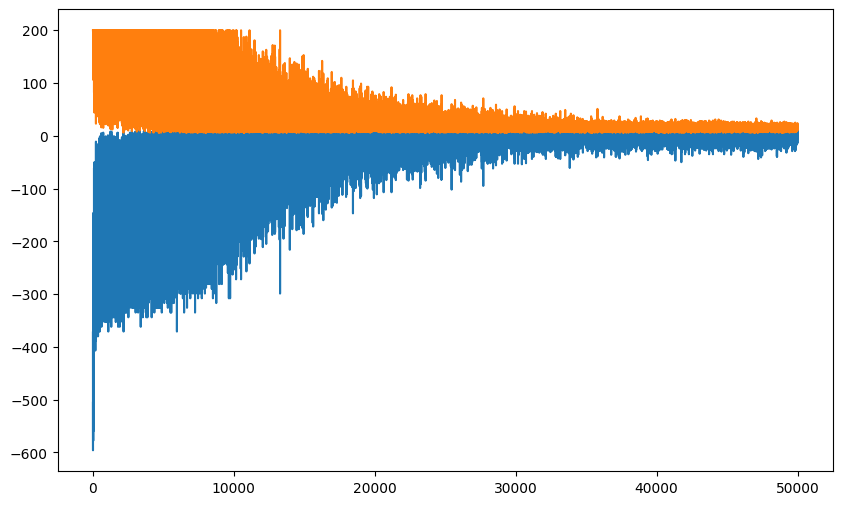

In [90]:
plt.figure(figsize=(10, 6))
plt.plot(rewards)
plt.plot(steps)

plt.show()

In [91]:
Q

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-2.70332692, -2.36141314, -3.08878827, -2.55140789,  1.62249462,
        -5.09307179],
       [-0.43031912,  0.37582159, -1.30357967,  0.38705977,  7.71468349,
        -2.81886435],
       ...,
       [-0.77850792,  0.81883805, -0.77996065, -0.75321553, -0.98297118,
        -0.88899792],
       [-2.14046373, -2.14143474, -2.1435847 , -0.97881387, -2.36821225,
        -2.19913167],
       [ 0.10849853,  0.06721574,  0.0744421 , 11.22265684, -0.08116603,
        -0.16365561]])

In [94]:
policy=[]
for i in tqdm(range(states)):
    policy.append(max(Q[i]))

print(policy)


100%|██████████| 500/500 [00:00<00:00, 128952.35it/s]

[0.0, 1.6224946194218859, 7.714683494822586, 2.913954062698607, -5.412243645596597, 0.0, -5.42342821886093, -4.498469403919063, -2.3126991082213006, -4.5171902267602615, 0.0, -3.9249553103078028, -5.034214898676765, -4.226790124013875, -5.0687738230283035, 0.0, 19.999999999999645, 2.9139983828784866, 9.68299824293694, 4.348898017747578, 0.0, -1.1097544393957965, 3.2391751202254198, -0.1903133579290095, -5.3622261671856, 0.0, -5.368095241633467, -4.345600933680331, -2.9743963512134064, -4.7709454215471325, 0.0, -4.322698196338802, -4.868319330346562, -3.9258405254521898, -4.915809968858744, 0.0, 11.841721481359103, -1.313164521594757, 1.3431906170942738, -0.887744203442845, 0.0, -5.115038274970909, -3.65543136226269, -4.7767364249406015, -3.1442525293095893, 0.0, -3.0461723979614654, -1.2889126893084906, -3.76775530367073, -5.474477331839414, 0.0, -5.058063600135376, -4.195808630084063, -3.188458530293047, -4.1987530837212095, 0.0, -0.6490890306761031, 0.22371447973477893, -0.9334604672

In [98]:
rewards_testing=[]
steps_testing=[]

In [108]:
i = 0
while i< 10:
    print("episode:", i+1)
    obs,_ = env.reset()
    done = False
    total_reward = 0
    step_count = 0
    while not done:
        state = obs
        action = epsilon_greedy_policy(state, Q)
        obs, reward, done, _, _ = env.step(action)
        total_reward += reward
        step_count += 1
        env.render()
    i+=1
    rewards_testing.append(total_reward)
    steps_testing.append(step_count)
    print('-> total reward: ', total_reward)
    print('-> total steps: ', step_count)

episode: 1
-> total reward:  -6
-> total steps:  18
episode: 2
-> total reward:  2
-> total steps:  19
episode: 3
-> total reward:  14
-> total steps:  7
episode: 4
-> total reward:  6
-> total steps:  15
episode: 5
-> total reward:  8
-> total steps:  13
episode: 6
-> total reward:  14
-> total steps:  7
episode: 7
-> total reward:  8
-> total steps:  13
episode: 8
-> total reward:  7
-> total steps:  14
episode: 9
-> total reward:  -7
-> total steps:  19
episode: 10
-> total reward:  6
-> total steps:  15


In [101]:
steps_testing

[8, 16, 20, 12, 16, 10, 13, 16, 11, 19]

In [109]:
rewards_testing

[-6, 2, 14, 6, 8, 14, 8, 7, -7, 6]

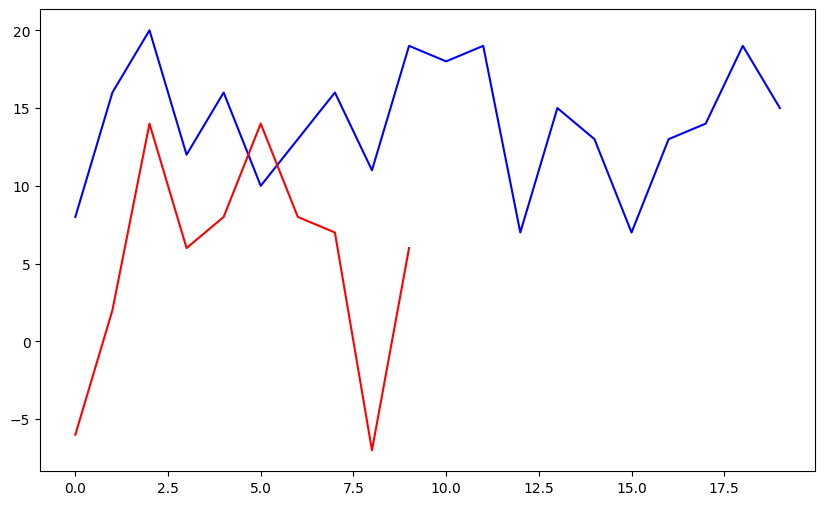

In [110]:
# Plot steps
plt.figure(figsize=(10, 6))
plt.plot(steps_testing, color='blue', label='Episode steps')

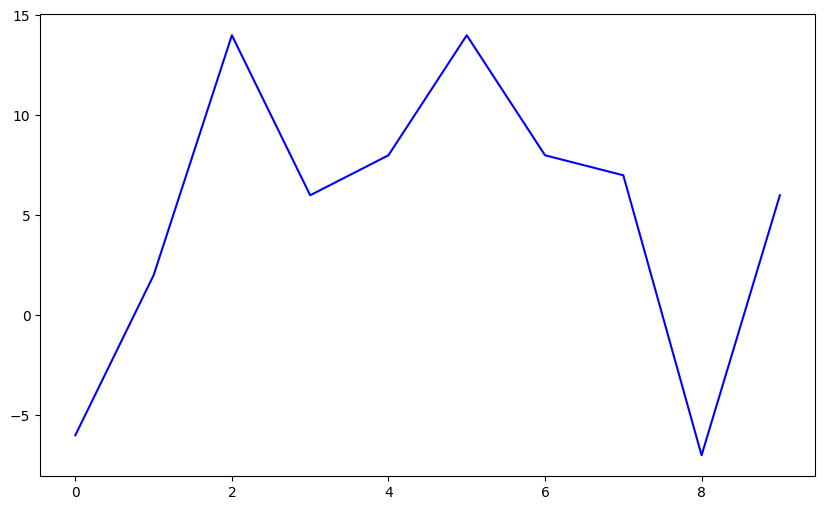

In [111]:
# Plot rewards
plt.figure(figsize=(10, 6))
plt.plot(rewards_testing, color='blue', label='Episode steps')

In [112]:
average_steps = np.mean(steps_testing)
print("average steps: ", average_steps)
average_rewards = np.mean(rewards_testing)
print("Average rewards: ", average_rewards)

average steps:  14.05
Average rewards:  5.2
